# Decision Forest Algorithms

## 🌳 What is Decision Tree?

A Decision Tree is a supervised machine learning algorithm that makes predictions by splitting data into smaller groups based on conditions.

It works like a flowchart where:
- Each internal node = a question/condition
- Each branch = outcome of the question
- Each leaf node = final prediction

Decision Trees are easy to understand, interpret, and work well for both classification and regression tasks.

## 📦 Import Required Libraries

In [48]:
# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 📂 Load Dataset

In [49]:
# 2. Load Demo Dataset
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")

df = pd.concat([X, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 🔍 Basic Exploratory Data Analysis

We perform basic EDA to understand:
- Data shape
- Missing values
- Feature distribution

In [50]:
# shape
print(df.shape)

(150, 5)


In [51]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [52]:
# describe
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


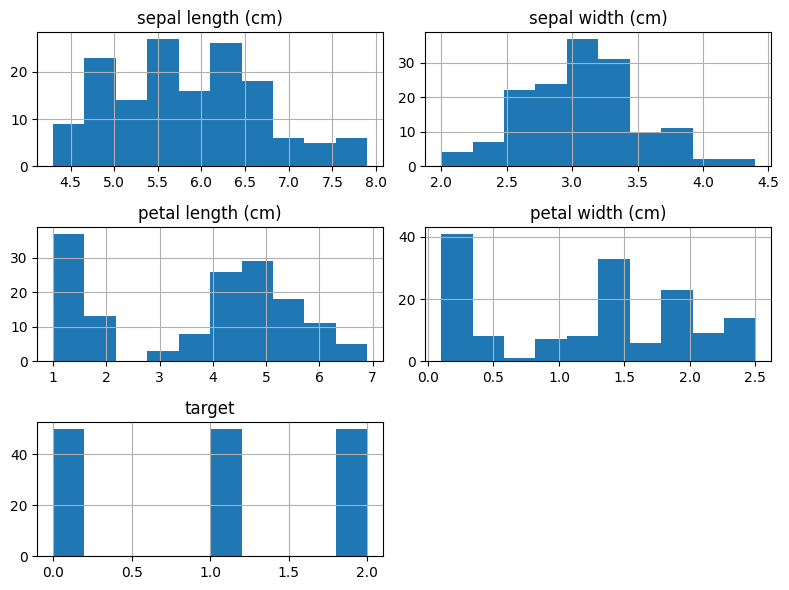

In [53]:
# Simple feature distribution graph
df.hist(figsize=(8,6))
plt.tight_layout()
plt.show()

### 📊 Feature Distribution

The histograms show how each feature is distributed in the dataset.

Key insights:
- Most features appear normally distributed.
- No extreme skewness is observed.
- Feature ranges look reasonable for model training.

This helps verify that the data is well-behaved before training the Decision Tree model.

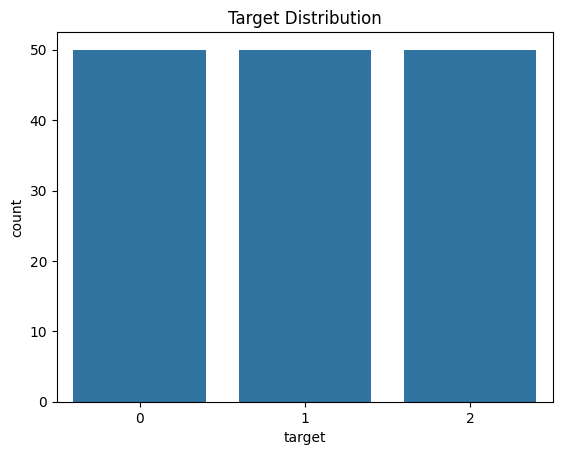

In [54]:
# Target count plot
sns.countplot(x=y)
plt.title("Target Distribution")
plt.show()

### 🎯 Target Distribution

The count plot shows how many samples belong to each class.

Key insights:
- Classes appear balanced.
- No major class imbalance is present.
- The dataset is suitable for classification.

Balanced data helps the Decision Tree learn fairly from all classes.

## ✂️ Train-Test Split

In [55]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 🌳 Decision Tree Model Training

In [56]:
# 5. Model Training
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

## 📊 Model Evaluation

In [57]:
# predictions
y_pred = model.predict(X_test)

# accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# report
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 📈 Model Performance

The Decision Tree model achieved **100% accuracy** on the test data.

Key insights:
- Precision = 1.00 → Model made no wrong positive predictions.
- Recall = 1.00 → Model correctly identified all actual cases.
- F1-score = 1.00 → Perfect balance between precision and recall.

Overall, the model performed perfectly on this dataset. However, such high accuracy may sometimes indicate overfitting.

### 🔮 Custom Prediction

We tested the trained Decision Tree model using a custom input sample.

Key insights:
- The model successfully generated a prediction for new unseen data.
- This demonstrates how the model can be used in real-world scenarios.
- Custom prediction helps verify that the trained model is working properly.


In [58]:
# Better with column names
custom_df = pd.DataFrame(
    [[5.1, 3.5, 1.4, 0.2]],
    columns=X.columns
)

prediction = model.predict(custom_df)

print("Prediction:", prediction)

Prediction: [0]


### 🏷️ Prediction Meaning

The model predicted class **0** for the custom input.

In the Iris dataset:
- Class 0 → Setosa
- Class 1 → Versicolor
- Class 2 → Virginica

This means the model classified the given sample as **Setosa**.

## 🏁 Conclusion

- Decision Tree learns by recursive splitting  
- Works well for non-linear data  
- Can overfit if depth is too high  